In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
dataset = pd.read_csv("IMDB_movie_reviews_details.csv")

In [2]:
dataset

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M
...,...,...,...,...,...,...,...,...,...,...
995,995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,76.0,A young New York socialite becomes interested ...,"169,575",NaN
996,996,Giant,1956,201,"Drama, Western",7.6,84.0,Sprawling epic covering the life of a Texas ca...,"34,759",NaN
997,997,Shane,1953,118,"Drama, Western",7.6,80.0,A weary gunfighter attempts to settle down wit...,"37,753",$20.00M
998,998,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,85.0,"In Hawaii in 1941, a private is cruelly punish...","44,086",$30.50M


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   name        1000 non-null   object 
 2   year        1000 non-null   object 
 3   runtime     1000 non-null   int64  
 4   genre       1000 non-null   object 
 5   rating      1000 non-null   float64
 6   metascore   841 non-null    float64
 7   timeline    1000 non-null   object 
 8   votes       1000 non-null   object 
 9   gross       829 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 78.3+ KB


In [4]:
dataset.head()

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M


In [5]:
dataset.isna().sum()

,0
Unnamed: 0,0
name,0
year,0
runtime,0
genre,0
rating,0
metascore,159
timeline,0
votes,0
gross,171


#### Deleting first column

In [7]:
# df = dataset
# df = df.drop(['id'], axis=1)
# df.head()
df = dataset
# Drop the column named 'Unnamed: 0' instead of 'id'
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M


#### Year column converted to int

In [8]:
df['year'] = df['year'].str.replace('I', '')
df['year'] = df['year'].str.replace(' ', '')
df['year'] = pd.to_numeric(df["year"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1000 non-null   object 
 1   year       1000 non-null   int64  
 2   runtime    1000 non-null   int64  
 3   genre      1000 non-null   object 
 4   rating     1000 non-null   float64
 5   metascore  841 non-null    float64
 6   timeline   1000 non-null   object 
 7   votes      1000 non-null   object 
 8   gross      829 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


#### Votes column converted to int

In [10]:
df['votes'] = df['votes'].str.replace(',', '')
df['votes'] = pd.to_numeric(df["votes"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1000 non-null   object 
 1   year       1000 non-null   int64  
 2   runtime    1000 non-null   int64  
 3   genre      1000 non-null   object 
 4   rating     1000 non-null   float64
 5   metascore  841 non-null    float64
 6   timeline   1000 non-null   object 
 7   votes      1000 non-null   int64  
 8   gross      829 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


#### Gross column converted to int

In [12]:
df['gross'] = df['gross'].str.replace('$', '')
df['gross'] = df['gross'].str.replace('M', '')
df['gross'] = pd.to_numeric(df["gross"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1000 non-null   object 
 1   year       1000 non-null   int64  
 2   runtime    1000 non-null   int64  
 3   genre      1000 non-null   object 
 4   rating     1000 non-null   float64
 5   metascore  841 non-null    float64
 6   timeline   1000 non-null   object 
 7   votes      1000 non-null   int64  
 8   gross      829 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB


#### Checking how numbers correlate

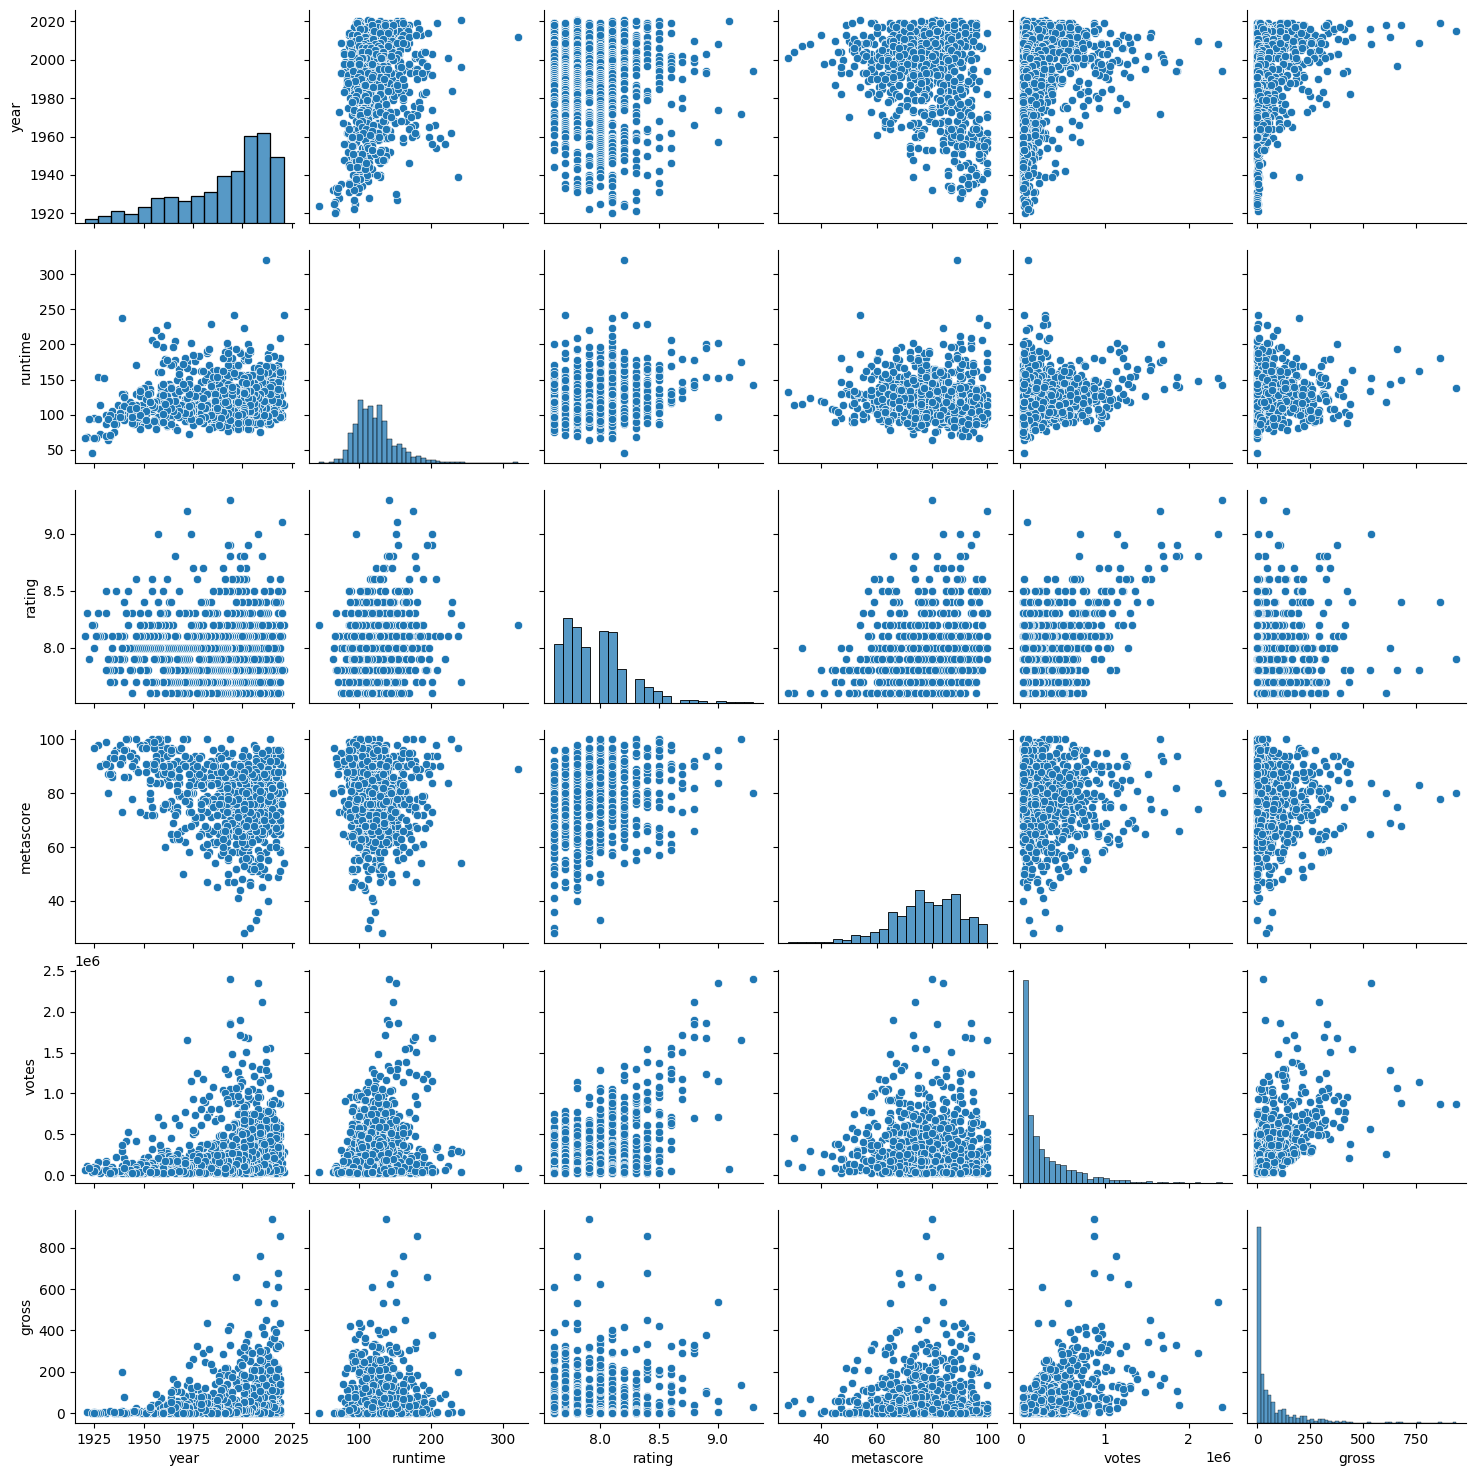

In [14]:
sns.pairplot(df)

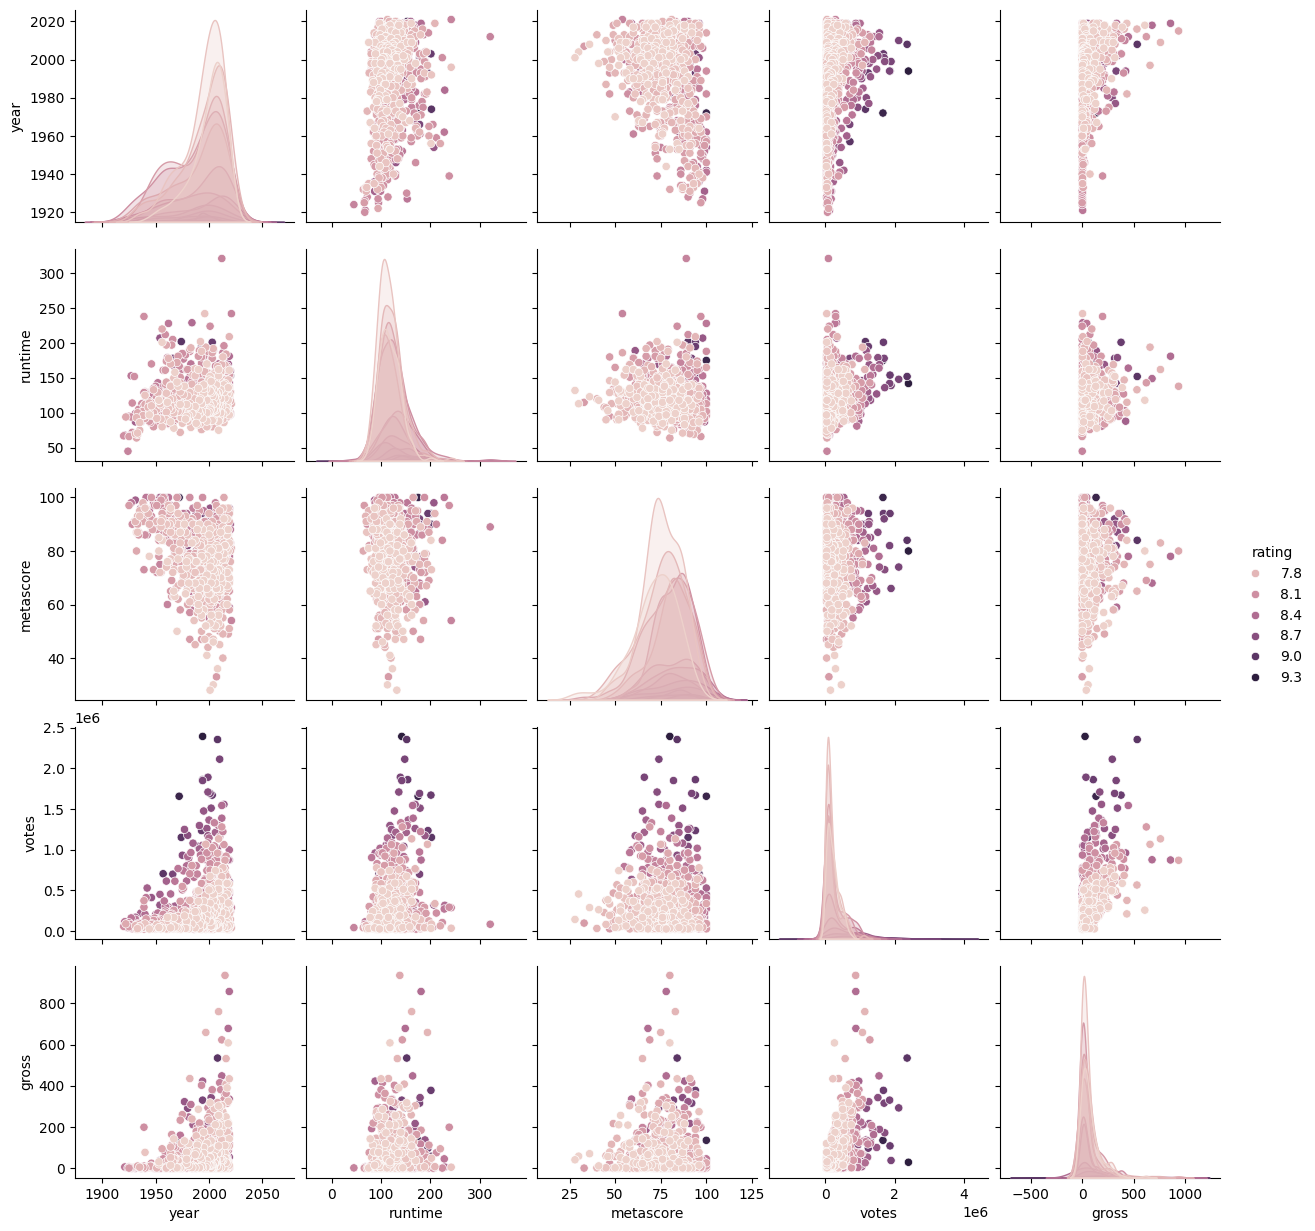

In [15]:
sns.pairplot(df, hue='rating')

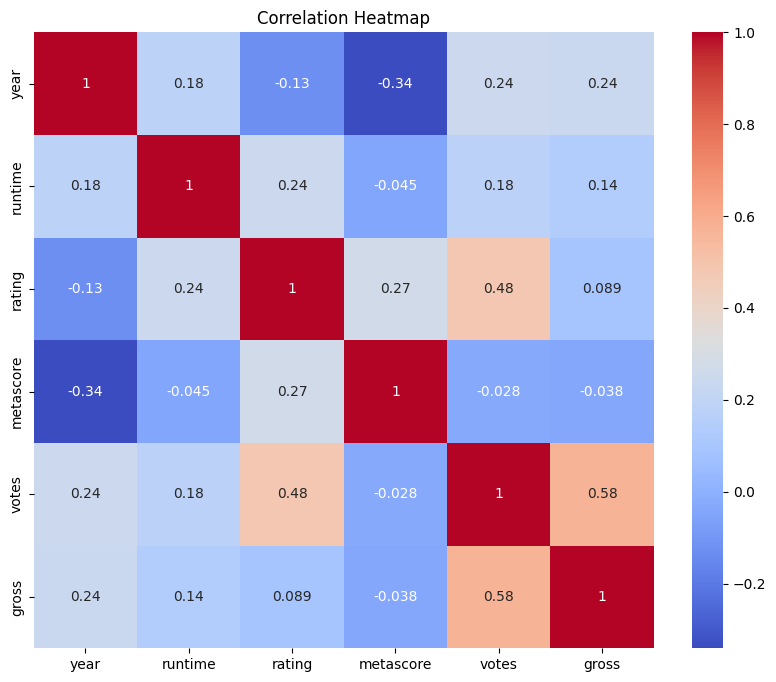

In [20]:
# plt.figure()
# cor = df.corr()
# sns.heatmap(cor, annot=True, cmap='coolwarm')
# plt.ylim()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))  # bạn có thể điều chỉnh kích thước
numeric_df = df.select_dtypes(include=['number'])  # chỉ giữ cột số
cor = numeric_df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#### Feature Engineering

In [21]:
df

,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,2394059,28.34
1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,1658439,134.97
2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...",78266,NaN
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,2355907,534.86
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,1152912,57.30
...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,76.0,A young New York socialite becomes interested ...,169575,NaN
996,Giant,1956,201,"Drama, Western",7.6,84.0,Sprawling epic covering the life of a Texas ca...,34759,NaN
997,Shane,1953,118,"Drama, Western",7.6,80.0,A weary gunfighter attempts to settle down wit...,37753,20.00
998,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,85.0,"In Hawaii in 1941, a private is cruelly punish...",44086,30.50


In [22]:
df[["genre_1","genre_2","genre_3"]] = df['genre'].str.split(',', n = 3, expand=True)
df = df.drop(['genre'], axis=1)

In [23]:
df.head()

,name,year,runtime,rating,metascore,timeline,votes,gross,genre_1,genre_2,genre_3
0,The Shawshank Redemption,1994,142,9.3,80.0,Two imprisoned men bond over a number of years...,2394059,28.34,Drama,None,None
1,The Godfather,1972,175,9.2,100.0,An organized crime dynasty's aging patriarch t...,1658439,134.97,Crime,Drama,None
2,Soorarai Pottru,2020,153,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...",78266,NaN,Drama,None,None
3,The Dark Knight,2008,152,9.0,84.0,When the menace known as the Joker wreaks havo...,2355907,534.86,Action,Crime,Drama
4,The Godfather: Part II,1974,202,9.0,90.0,The early life and career of Vito Corleone in ...,1152912,57.30,Crime,Drama,None


In [24]:
df['genre_1'] = df['genre_1'].str.replace(' ', '')
df['genre_2'] = df['genre_2'].str.replace(' ', '')
df['genre_3'] = df['genre_3'].str.replace(' ', '')

In [25]:
l1 = df.genre_1.unique()
l2 = df.genre_2.unique()
l3 = df.genre_3.unique()
l = list(l1) + list(l2) + list(l3)
l = [i for i in l if i]
l = list(set(l))
print(l)

['Mystery', 'Thriller', 'Sport', 'Comedy', 'Crime', 'Romance', 'Fantasy', 'Sci-Fi', 'Musical', 'Film-Noir', 'Music', 'Adventure', 'Horror', 'Drama', 'Animation', 'Family', 'Western', 'Biography', 'Action', 'History', 'War']


In [26]:
len(l)

21

In [27]:
listofzeros = [0] * 1000
for genre in l:
    df[genre] = listofzeros
df.head()

,name,year,runtime,rating,metascore,timeline,votes,gross,genre_1,genre_2,...,Adventure,Horror,Drama,Animation,Family,Western,Biography,Action,History,War
0,The Shawshank Redemption,1994,142,9.3,80.0,Two imprisoned men bond over a number of years...,2394059,28.34,Drama,None,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1972,175,9.2,100.0,An organized crime dynasty's aging patriarch t...,1658439,134.97,Crime,Drama,...,0,0,0,0,0,0,0,0,0,0
2,Soorarai Pottru,2020,153,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...",78266,NaN,Drama,None,...,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight,2008,152,9.0,84.0,When the menace known as the Joker wreaks havo...,2355907,534.86,Action,Crime,...,0,0,0,0,0,0,0,0,0,0
4,The Godfather: Part II,1974,202,9.0,90.0,The early life and career of Vito Corleone in ...,1152912,57.30,Crime,Drama,...,0,0,0,0,0,0,0,0,0,0


In [28]:
for genre in l:
    for x in range(1000):
        if df.at[x, 'genre_1'] == genre or df.at[x, 'genre_2'] == genre or df.at[x, 'genre_3'] == genre:
            df.at[x, genre] = 1

In [29]:
df.head()

,name,year,runtime,rating,metascore,timeline,votes,gross,genre_1,genre_2,...,Adventure,Horror,Drama,Animation,Family,Western,Biography,Action,History,War
0,The Shawshank Redemption,1994,142,9.3,80.0,Two imprisoned men bond over a number of years...,2394059,28.34,Drama,None,...,0,0,1,0,0,0,0,0,0,0
1,The Godfather,1972,175,9.2,100.0,An organized crime dynasty's aging patriarch t...,1658439,134.97,Crime,Drama,...,0,0,1,0,0,0,0,0,0,0
2,Soorarai Pottru,2020,153,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...",78266,NaN,Drama,None,...,0,0,1,0,0,0,0,0,0,0
3,The Dark Knight,2008,152,9.0,84.0,When the menace known as the Joker wreaks havo...,2355907,534.86,Action,Crime,...,0,0,1,0,0,0,0,1,0,0
4,The Godfather: Part II,1974,202,9.0,90.0,The early life and career of Vito Corleone in ...,1152912,57.30,Crime,Drama,...,0,0,1,0,0,0,0,0,0,0


#### Checking how genre correlate

(np.float64(21.0), np.float64(0.0))

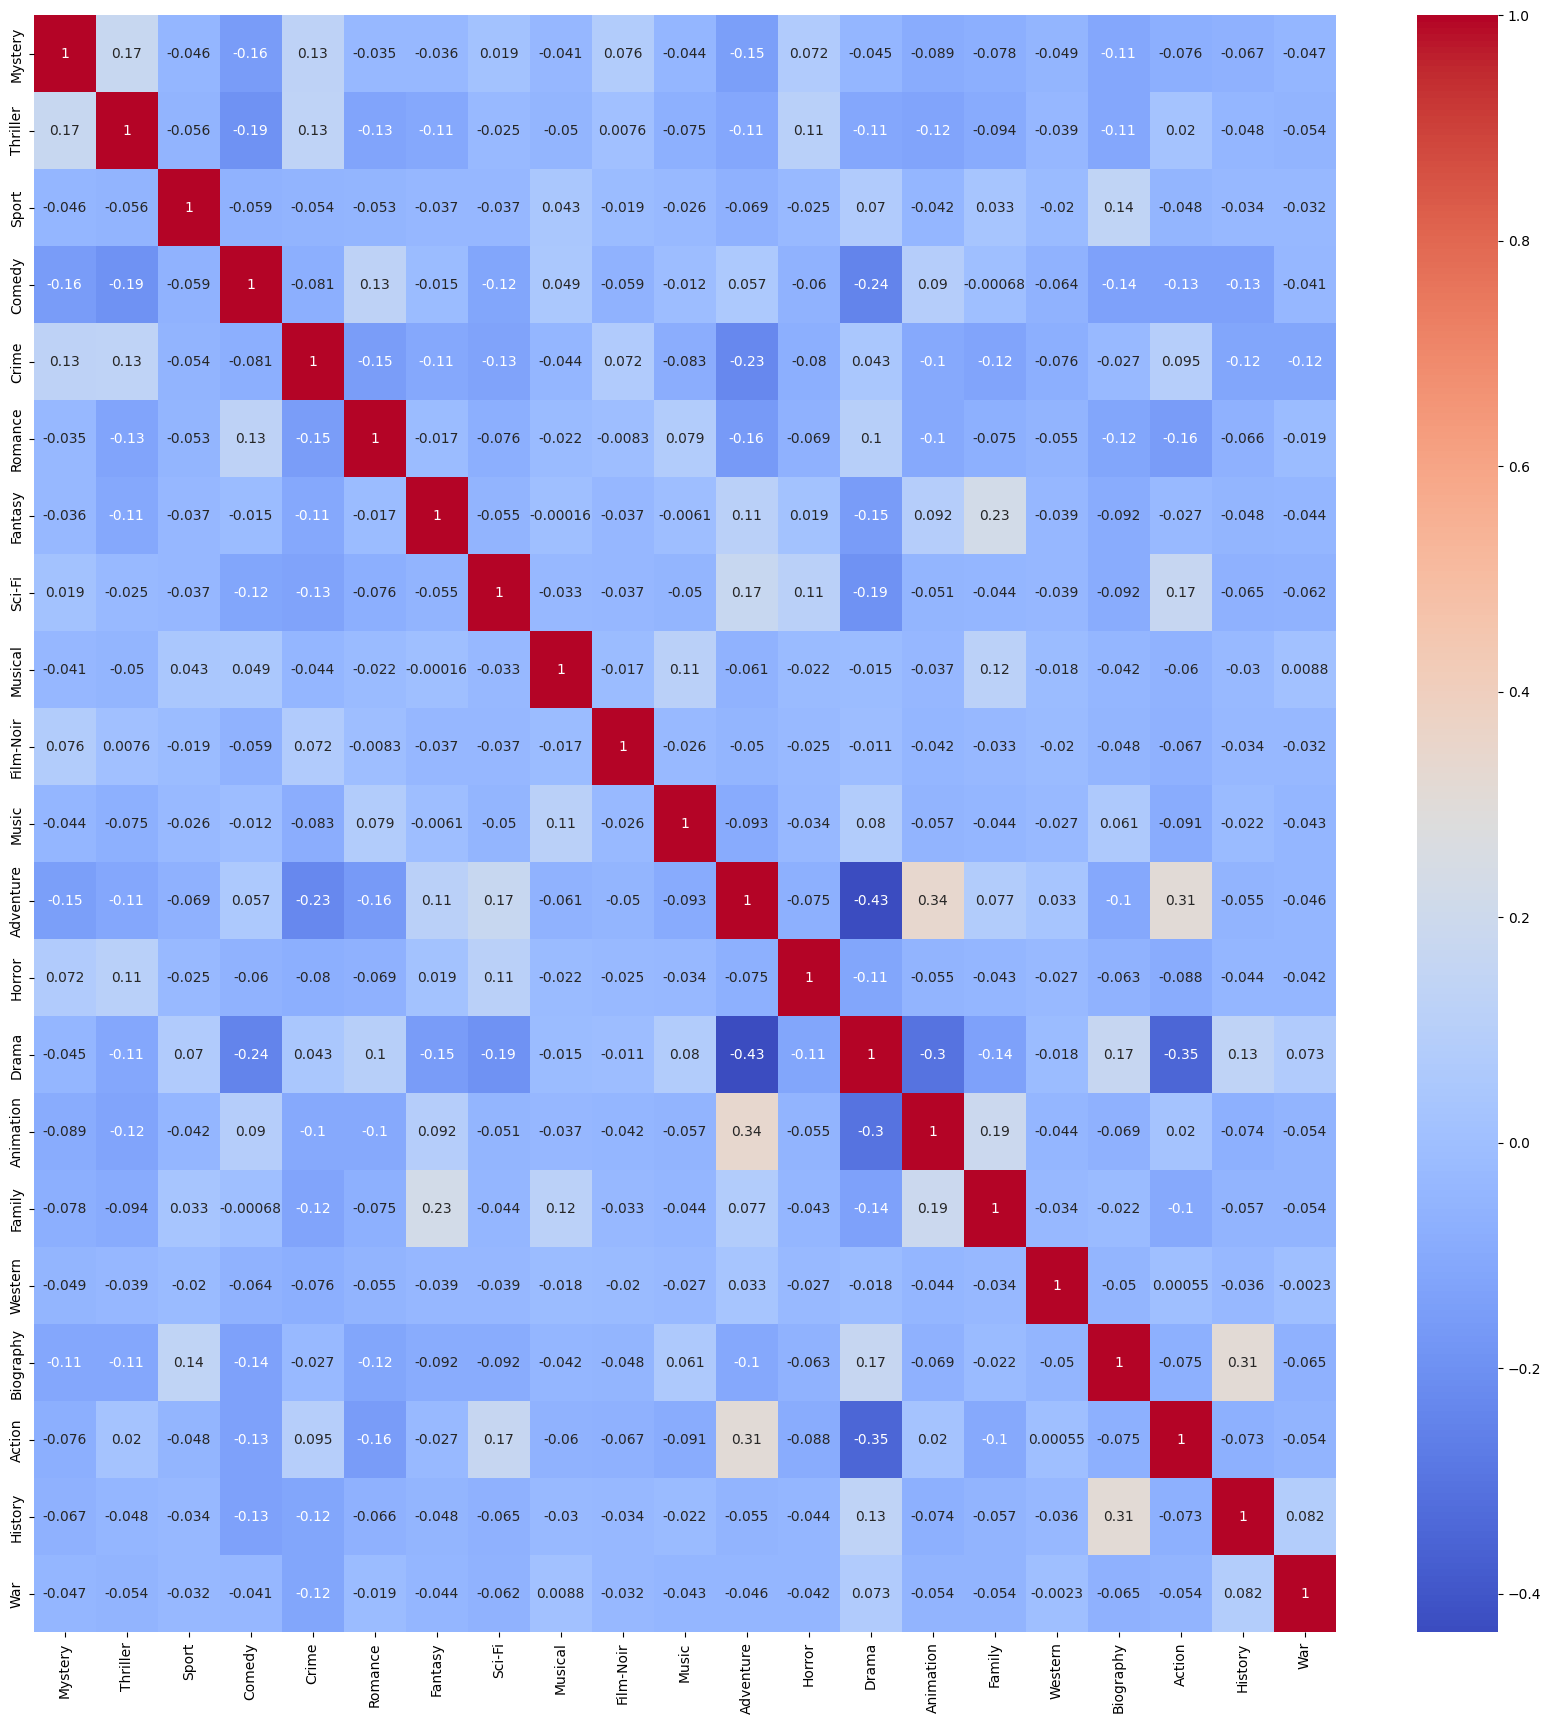

In [30]:
plt.figure(figsize=(21,21))
cor = df[l].corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.ylim()

#### Removing unwanted columns for model training

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1000 non-null   object 
 1   year       1000 non-null   int64  
 2   runtime    1000 non-null   int64  
 3   rating     1000 non-null   float64
 4   metascore  841 non-null    float64
 5   timeline   1000 non-null   object 
 6   votes      1000 non-null   int64  
 7   gross      829 non-null    float64
 8   genre_1    1000 non-null   object 
 9   genre_2    892 non-null    object 
 10  genre_3    643 non-null    object 
 11  Mystery    1000 non-null   int64  
 12  Thriller   1000 non-null   int64  
 13  Sport      1000 non-null   int64  
 14  Comedy     1000 non-null   int64  
 15  Crime      1000 non-null   int64  
 16  Romance    1000 non-null   int64  
 17  Fantasy    1000 non-null   int64  
 18  Sci-Fi     1000 non-null   int64  
 19  Musical    1000 non-null   int64  
 20  Film-Noir

In [32]:
#Not taking 'Horror' column to avoid dummy variable trap
df_model = df[['year', 'runtime', 'votes', 'metascore', 'gross', 'Mystery', 'Drama', 'Musical', 'Fantasy', 'Adventure', 'Western', 'Thriller', 'War', 'Biography', 'Family', 'Sport', 'Film-Noir', 'Music', 'Sci-Fi', 'Animation', 'Romance', 'Crime', 'Action', 'Comedy', 'History', 'rating']]
df_model.head()

,year,runtime,votes,metascore,gross,Mystery,Drama,Musical,Fantasy,Adventure,...,Film-Noir,Music,Sci-Fi,Animation,Romance,Crime,Action,Comedy,History,rating
0,1994,142,2394059,80.0,28.34,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9.3
1,1972,175,1658439,100.0,134.97,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,9.2
2,2020,153,78266,NaN,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9.1
3,2008,152,2355907,84.0,534.86,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,9.0
4,1974,202,1152912,90.0,57.30,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,9.0


In [33]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1000 non-null   int64  
 1   runtime    1000 non-null   int64  
 2   votes      1000 non-null   int64  
 3   metascore  841 non-null    float64
 4   gross      829 non-null    float64
 5   Mystery    1000 non-null   int64  
 6   Drama      1000 non-null   int64  
 7   Musical    1000 non-null   int64  
 8   Fantasy    1000 non-null   int64  
 9   Adventure  1000 non-null   int64  
 10  Western    1000 non-null   int64  
 11  Thriller   1000 non-null   int64  
 12  War        1000 non-null   int64  
 13  Biography  1000 non-null   int64  
 14  Family     1000 non-null   int64  
 15  Sport      1000 non-null   int64  
 16  Film-Noir  1000 non-null   int64  
 17  Music      1000 non-null   int64  
 18  Sci-Fi     1000 non-null   int64  
 19  Animation  1000 non-null   int64  
 20  Romance  

#### Calculating mean and filling missing data

In [34]:
X = df_model.iloc[:,:-1].values
y = df_model.iloc[:,25].values

In [35]:
np.set_printoptions(suppress=True)
X

array([[   1994.,     142., 2394059., ...,       0.,       0.,       0.],
       [   1972.,     175., 1658439., ...,       0.,       0.,       0.],
       [   2020.,     153.,   78266., ...,       0.,       0.,       0.],
       ...,
       [   1953.,     118.,   37753., ...,       0.,       0.,       0.],
       [   1953.,     118.,   44086., ...,       0.,       0.,       0.],
       [   1944.,      97.,   26903., ...,       0.,       0.,       0.]])

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,3:5])
X[:,3:5] = imputer.transform(X[:,3:5])

In [37]:
X[0,:]

array([   1994.  ,     142.  , 2394059.  ,      80.  ,      28.34,
             0.  ,       1.  ,       0.  ,       0.  ,       0.  ,
             0.  ,       0.  ,       0.  ,       0.  ,       0.  ,
             0.  ,       0.  ,       0.  ,       0.  ,       0.  ,
             0.  ,       0.  ,       0.  ,       0.  ,       0.  ])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
#X_train, X_test

In [ ]:
#y_train, y_test

#### Implementing Algorithms

##### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

import numpy as np

# Thông tin phim Avengers
year = 2018
runtime = 149
votes = 877735
metascore = 68
gross = 678.82

# Danh sách thể loại theo code trước (có thể khác nếu bạn dùng list khác)
genres = ['Mystery', 'Drama', 'Musical', 'Fantasy', 'Adventure', 'Western', 'Thriller', 'War',
          'Biography', 'Family', 'Sport', 'Film-Noir', 'Music', 'Sci-Fi', 'Animation', 'Romance',
          'Crime', 'Action', 'Comedy', 'History']

# Thể loại phim này là Action, Adventure, Sci-Fi
movie_genres = ['Action', 'Adventure', 'Sci-Fi']

# Tạo vector one-hot encoding
genre_vector = [1 if genre in movie_genres else 0 for genre in genres]

# Tạo input cho mô hình LinearRegression (đảm bảo đúng thứ tự các cột như X_train)
new_movie_input = np.array([[year, runtime, votes, metascore, gross] + genre_vector])

# Dự đoán điểm rating
predicted_rating = regressor.predict(new_movie_input)

print(f"Dự đoán điểm IMDb của Avengers: Infinity War là: {predicted_rating[0]:.2f}")


Dự đoán điểm IMDb của Avengers: Infinity War là: 7.72


In [51]:
accuracy = regressor.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 30.980973693268666 %


##### Polynomial Regression

In [52]:
from sklearn.preprocessing import PolynomialFeatures
for degree in range(1,4):
    poly_reg = PolynomialFeatures(degree = degree)
    X_poly = poly_reg.fit_transform(X)
    lin_reg2 = LinearRegression()
    lin_reg2.fit(X_poly,y)
    accuracy = lin_reg2.score(poly_reg.fit_transform(X),y)
    print('Accuracy of the model is with degree',str(degree),'=',accuracy*100,'%')

Accuracy of the model is with degree 1 = 44.74549675905855 %
Accuracy of the model is with degree 2 = 65.93423474251698 %
Accuracy of the model is with degree 3 = 92.05489063272393 %


##### Random Forest Regression

In [54]:
# # from sklearn.ensemble import RandomForestRegressor
# # x = 500
# # regressor = RandomForestRegressor(n_estimators = x)
# # regressor.fit(X,y)
# # accuracy = regressor.score(X,y)
# print('Accuracy of the model with',str(x),'n_estimators','=',accuracy*100,'%')

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pickle
# Huấn luyện mô hình
regressor_rf = RandomForestRegressor(n_estimators=500)
regressor_rf.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_rf = regressor_rf.predict(X_test)

# Đánh giá mô hình
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# In kết quả
print("Random Forest Regression:")
print("R² score:", r2_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(regressor_rf, f)

print("Mô hình đã được lưu vào random_forest_model.pkl")
# Giá trị phim Avengers
year = 2018
runtime = 149
votes = 877735
metascore = 68
gross = 678.82

# Danh sách các thể loại (đã lấy từ biến l trong code bạn)
genres = ['Mystery', 'Drama', 'Musical', 'Fantasy', 'Adventure', 'Western', 'Thriller', 'War',
          'Biography', 'Family', 'Sport', 'Film-Noir', 'Music', 'Sci-Fi', 'Animation', 'Romance',
          'Crime', 'Action', 'Comedy', 'History']



# Tạo vector one-hot cho genre
avengers_genres = ['Action', 'Adventure', 'Sci-Fi']
genre_vector = [1 if g in avengers_genres else 0 for g in genres]

# Tạo input array đầy đủ
new_movie_input = np.array([[year, runtime, votes, metascore, gross] + genre_vector])

# Dự đoán điểm rating
predicted_rating = regressor_rf.predict(new_movie_input)

print("Dự đoán điểm IMDb của phim The Shawshank Redemption là:", predicted_rating[0])

Random Forest Regression:
R² score: 0.488080042316657
RMSE: 0.17460053092702998
MAE: 0.14434100000000163
Mô hình đã được lưu vào random_forest_model.pkl
Dự đoán điểm IMDb của phim The Shawshank Redemption là: 8.27740000000004


##### SVR

In [61]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
accuracy = regressor.score(X,y)
print('Accuracy of the model is',accuracy*100,'%')

import numpy as np

# Thông tin phim Avengers
year = 2018
runtime = 149
votes = 877735
metascore = 68
gross = 678.82

genres = ['Mystery', 'Drama', 'Musical', 'Fantasy', 'Adventure', 'Western', 'Thriller', 'War',
          'Biography', 'Family', 'Sport', 'Film-Noir', 'Music', 'Sci-Fi', 'Animation', 'Romance',
          'Crime', 'Action', 'Comedy', 'History']

movie_genres = ['Action', 'Adventure', 'Sci-Fi']

genre_vector = [1 if genre in movie_genres else 0 for genre in genres]

new_movie_input = np.array([[year, runtime, votes, metascore, gross] + genre_vector])

# Chuẩn hóa dữ liệu đầu vào mới với sc_X
new_movie_input_scaled = sc_X.transform(new_movie_input)

# Dự đoán điểm rating (chuẩn hóa)
predicted_rating_scaled = regressor.predict(new_movie_input_scaled)

# Đưa điểm về dạng gốc (giá trị y ban đầu)
predicted_rating = sc_y.inverse_transform(predicted_rating_scaled.reshape(-1,1))

print(f"Dự đoán điểm IMDb của Avengers: Infinity War là: {predicted_rating[0][0]:.2f}")


Accuracy of the model is 59.74231119031581 %
Dự đoán điểm IMDb của Avengers: Infinity War là: 0.32
